In [115]:
import pandas as pd
import numpy as np
import csv
import glob
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [118]:
# get job search information data into a table by combining

path = r'C:\Users\Jungu\NYCDSA\Python Project\dataset'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    li_df = pd.read_csv(filename, index_col=None, header=0)
    li.append(li_df)

df1 = pd.concat(li, axis=0, ignore_index=True)

In [119]:
df1

,JobTitle,Company,Rate,Location,Remote,url address
0,"Senior Manager, Enablement Data Science",Salesforce,4.3,Chicago,None,https://www.indeed.com/cmp/Salesforce
1,Data Scientist,Momentum Staffing Group LLC,3.9,Chicago,None,https://www.indeed.com/cmp/Momentum-Staffing-G...
2,Data Science Analyst,The University of Chicago,4.1,Chicago,None,https://www.indeed.com/cmp/The-University-of-C...
3,Data Scientist,Deloitte,4.0,Chicago,None,https://www.indeed.com/cmp/Deloitte
4,Senior Data Scientist (Remote),Verikai,None,Chicago,•,NaN
...,...,...,...,...,...,...
5167,FULL-STACK WEB DEVELOPER,Twelve23,4.0,Seattle,None,https://www.indeed.com/cmp/Twelve23
5168,Sr. Fullstack Software Engineer - Webex Online...,Akraya Inc.,3.6,Seattle,None,https://www.indeed.com/cmp/Akraya-Inc.
5169,UI / Front End Developer,Audax Labs,None,Seattle,None,NaN
5170,Software Development Engineer,Capital Group,3.9,Seattle,•,https://www.indeed.com/cmp/Capital-Group-1


In [124]:
# get all company evaluation information into a table

df2 = pd.read_csv("rate and salary1.csv", index_col = None, header = None)

In [131]:
# rename some columns

df2 = df2.rename(columns={0: "name", 1:"Overall", 2:"5star", 3:"4star", 4:"3star", 5:"2star", 6:"1star", 7:"Salary",8: "url"})

In [133]:
# do merge by left join

df_join = df1.merge(df2, left_on='url address', right_on='url', how='left')

In [134]:
df_join

,JobTitle,Company,Rate,Location,Remote,url address,name,Overall,5star,4star,3star,2star,1star,Salary,url
0,"Senior Manager, Enablement Data Science",Salesforce,4.3,Chicago,None,https://www.indeed.com/cmp/Salesforce,Salesforce,4.3,451,219,77,32,16,78%,https://www.indeed.com/cmp/Salesforce
1,Data Scientist,Momentum Staffing Group LLC,3.9,Chicago,None,https://www.indeed.com/cmp/Momentum-Staffing-G...,Momentum-Staffing-Group,3.9,6,0,1,0,2,57%,https://www.indeed.com/cmp/Momentum-Staffing-G...
2,Data Science Analyst,The University of Chicago,4.1,Chicago,None,https://www.indeed.com/cmp/The-University-of-C...,The-University-of-Chicago,4.1,287,210,102,33,25,62%,https://www.indeed.com/cmp/The-University-of-C...
3,Data Scientist,Deloitte,4.0,Chicago,None,https://www.indeed.com/cmp/Deloitte,Deloitte,4.0,3.6K,4K,1.9K,543,346,63%,https://www.indeed.com/cmp/Deloitte
4,Senior Data Scientist (Remote),Verikai,None,Chicago,•,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,FULL-STACK WEB DEVELOPER,Twelve23,4.0,Seattle,None,https://www.indeed.com/cmp/Twelve23,Twelve23,4.0,1,0,1,0,0,NaN,https://www.indeed.com/cmp/Twelve23
5168,Sr. Fullstack Software Engineer - Webex Online...,Akraya Inc.,3.6,Seattle,None,https://www.indeed.com/cmp/Akraya-Inc.,Akraya-Inc.,3.6,4,4,2,4,0,69%,https://www.indeed.com/cmp/Akraya-Inc.
5169,UI / Front End Developer,Audax Labs,None,Seattle,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5170,Software Development Engineer,Capital Group,3.9,Seattle,•,https://www.indeed.com/cmp/Capital-Group-1,Capital-Group-1,3.9,168,111,61,19,37,68%,https://www.indeed.com/cmp/Capital-Group-1


In [162]:
# change K -> 1,000 and make data type as numeric

replace_col = ["5star","4star","3star","2star","1star"]
for lis in replace_col:
    df_join[lis] = df_join[lis].replace(r'[KM]+$', '', regex=True).astype(float) * \
        df_join[lis].str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1).replace(['K','M'],[10**3, 10**6]).astype(int)

In [172]:
df_join.shape

(5172, 15)

In [136]:
# remove % symbol in 'Salary Satisfaction'

df_join['Salary'] = df_join['Salary'].replace('%','',regex=True).astype(float)

In [137]:
df_join['Company'].value_counts()

Deloitte                     240
Amazon.com Services LLC      118
Recruiting From Scratch       88
Accenture                     72
Amazon Web Services, Inc.     49
                            ... 
Whop                           1
Firefly Engagement             1
DonationXchange                1
nwo.ai                         1
Tilting Point                  1
Name: Company, Length: 1913, dtype: int64

In [167]:
remote_total = df_join.groupby('Company').agg({'Remote': 'count'})
remote_total['Remote'].value_counts()

1      988
2      440
3      190
4       94
5       67
6       38
7       21
8       14
11       9
9        8
14       6
12       4
16       3
19       3
10       3
13       3
15       2
22       2
37       2
42       1
118      1
88       1
72       1
49       1
46       1
43       1
35       1
39       1
30       1
26       1
24       1
21       1
20       1
18       1
240      1
Name: Remote, dtype: int64

In [139]:
# count the remote bullets per company
remote_actual = df_join.groupby('Company')['Remote'].apply(lambda x: (x!='None').sum()).reset_index(name='rcount')

In [140]:
# remote job / total job = remote density
remote_density = remote_total.merge(remote_actual, on='Company', how='left')
remote_density = remote_density.assign(
    remote_density = remote_density['rcount']/remote_density['Remote']
)

In [141]:
# left join
df_rate_den = df_join.merge(remote_density, on='Company', how='left' ).groupby('Company').mean()

Text(0, 0.5, 'Rate')

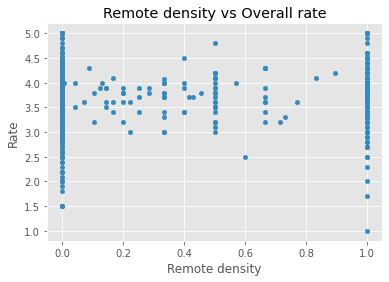

In [175]:
df_rate_den.plot(x='remote_density',y='Overall',kind='scatter')
plt.title("Remote density vs Overall rate")
plt.xlabel("Remote density")
plt.ylabel("Rate")

Text(0, 0.5, 'Salary satisfaction(%)')

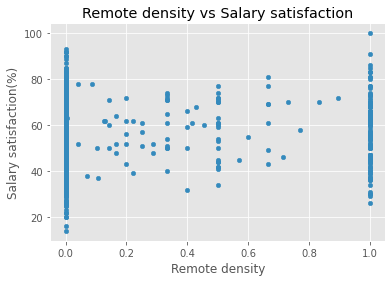

In [174]:
df_rate_den.plot(x='remote_density',y='Salary',kind='scatter')
plt.title("Remote density vs Salary satisfaction")
plt.xlabel("Remote density")
plt.ylabel("Salary satisfaction(%)")

Text(0, 0.5, 'Overall rate')

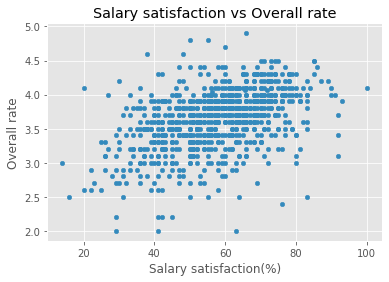

In [176]:
df_rate_den.plot(x='Salary', y='Overall', kind='scatter')
plt.title("Salary satisfaction vs Overall rate")
plt.xlabel("Salary satisfaction(%)")
plt.ylabel("Overall rate")

In [144]:
df_join[df_join.eq('wpromote').any(1)]

,JobTitle,Company,Rate,Location,Remote,url address,name,Overall,5star,4star,3star,2star,1star,Salary,url
595,Senior Data Analyst,wpromote,4.4,Los Angeles,•,https://www.indeed.com/cmp/Wpromote,Wpromote,4.4,4,3,1,0,0,47.0,https://www.indeed.com/cmp/Wpromote
2488,Analytics Implementation Engineer,wpromote,4.4,Chicago,•,https://www.indeed.com/cmp/Wpromote,Wpromote,4.4,4,3,1,0,0,47.0,https://www.indeed.com/cmp/Wpromote
3431,Analytics Implementation Engineer,wpromote,4.4,Los Angeles,•,https://www.indeed.com/cmp/Wpromote,Wpromote,4.4,4,3,1,0,0,47.0,https://www.indeed.com/cmp/Wpromote
4373,Analytics Implementation Engineer,wpromote,4.4,New York,•,https://www.indeed.com/cmp/Wpromote,Wpromote,4.4,4,3,1,0,0,47.0,https://www.indeed.com/cmp/Wpromote
